# 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate
%matplotlib inline

In [13]:
fx = lambda x : 1/(1+25*x**2)
xk1 = -1+2/10*np.arange(11)
yk1 = fx(xk1)

In [14]:
def interpolation(x, y):
    n = x.size
    fm = np.prod(np.array(list(map(lambda xx:(xx-x), x)))+np.eye(n), axis=1)
    def formula(xp):
        sum = 0
        for i in range(n):
            lf = 1.0
            for j in range(n):
                if i != j:
                    lf *= (xp - x[j])
            sum +=  lf*y[i]/fm[i]
        return sum
    return formula

In [15]:
lx1 = interpolation(xk1, yk1)

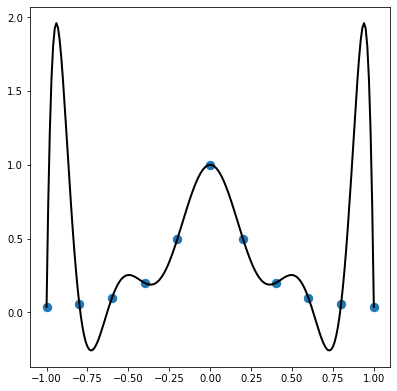

In [16]:
xc = np.arange(-1, 1.01, 0.01)
ylx1 = lx1(xc)
ax = plt.figure(figsize=[5,5]).add_axes([0,0,1,1])
ax.scatter(xk1, yk1, s=70)
ax.plot(xc, ylx1, c='k', lw=2.0)

In [18]:
def inter_gral(x, y): # 插值求积分
    x = xk
    y = yk
    n = x.size
    ub = max(x)
    lb = min(x)
    fm = np.prod(np.array(list(map(lambda xx:(xx-x), x)))+np.eye(n), axis=1)
    sum = 0.0
    xx = symbols('x')
    for i in range(n):
        lf = 1
        for j in range(n):
            if i != j:
                lf *= (xx - x[j])
        sum += y[i] * float(integrate(lf, (xx, lb, ub))) / fm[i] # 这里多项式积分用符号计算
    return sum
        


In [20]:
inte1 = inter_gral(xk1, yk1)
print(inte1)

0.5657796961095597


# 2

In [21]:
fxk2 = lambda k,n : np.cos((2*k+1)/2/(n+1)*np.pi)
xk2 = fxk2(np.arange(11), 10)
yk2 = fx(xk2)

In [22]:
lx2 = interpolation(xk2, yk2)

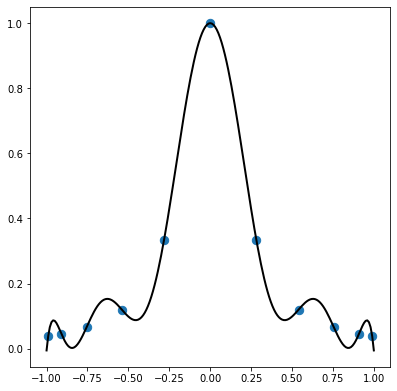

In [23]:
ylx2 = lx2(xc)
ax = plt.figure(figsize=[5,5]).add_axes([0,0,1,1])
ax.scatter(xk2, yk2, s=70)
ax.plot(xc, ylx2, c='k', lw=2.0)

In [24]:
inte2 = inter_gral(xk2, yk2)
print(inte2)

0.5657796961095597


# 3

In [25]:
fxk3 = lambda k,n : -1+2/n*k
xk3 = fxk3(np.arange(11), 10)
yk3 = fx(xk3)

In [41]:
def pline(xk, yk):
    ax = plt.figure(figsize=[5,5]).add_axes([0,0,1,1])
    ax.scatter(xk, yk, s=70)
    sum = 0.0
    for i in range(xk.size-1):
        ax.plot(xk[i:i+2], yk[i:i+2], c='k', lw=2.0)
        h = xk[i+1] - xk[i]
        w = yk[i+1] + yk[i]
        sum += h*w/2
    return sum
    

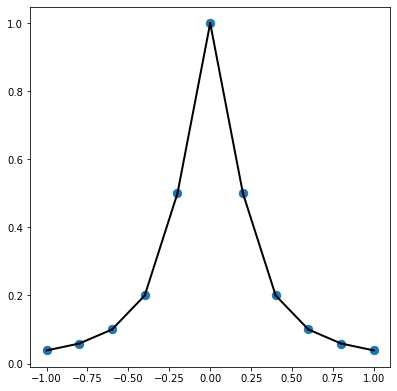

In [42]:
inte3 = pline(xk3,yk3)

In [43]:
inte3

0.5512217194570135

# 4

In [48]:
xk4 = np.linspace(-1, 1, 11)

In [52]:
def gauss2(fx, lb, ub): # 二阶gauss求fx在[lb, ub]间的积分
    c = (lb+ub)/2
    d = (ub-lb)/2
    inte = d*(fx(d*1/np.sqrt(3)+c)+fx(-d*1/np.sqrt(3)+c)) # 将坐标变换为[-1, 1]区间的求积公式
    return inte

In [54]:
sum = 0.0
for i in range(xk4.size-1):
    lb = xk4[i]
    ub = xk4[i+1]
    sum += gauss2(fx, lb, ub) # 每个区间求积相加
print(sum)

0.5499216511528033
